Definimos las funciones que necesitamos para el procesamiento de datos.

In [50]:
import pandas as pd


def get_filepath(temperature, volume, sufix):
  from glob import glob
  folder = f"../DatosArgonLJ_Temp{temperature}_Vol{volume}/"
  filepath = glob(folder + '*' + sufix)[0]

  return filepath


def get_thermodinamic_df(filepath):
  return pd.read_csv(
    filepath,
    sep=' ',
    header=None,
    skiprows=1,
    names=[
      'tiempo [fms]',
      'Temperatura [K]',
      'EnergiaTotal [Kcal/mol]',
      'EnergiaCineticaTotal [Kcal/mol]',
      'Presion [Atm]',
      'Volumen [ang**3]',
      'Densidad [g cm**-3]'
    ]
  )

Extraemos las mediciones de presión de los archivos de salida de LAMMPS.

In [55]:
volume = 9000000
sufix = '__termodinamica'
temperatures = tuple(range(100, 2000 + 1, 100,))
pressures = []

for temperature in temperatures:
  thermodinamic = get_thermodinamic_df(get_filepath(temperature, volume, sufix))

  pressure = thermodinamic['Presion [Atm]'].mean()
  pressures.append(pressure)

Graficamos estos datos.

<AxesSubplot:xlabel='Temperatura [K]'>

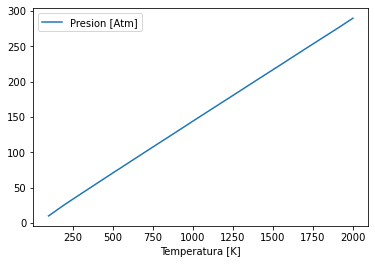

In [56]:
df = pd.DataFrame({'Temperatura [K]': temperatures, 'Presion [Atm]': pressures})
df.plot(x='Temperatura [K]', y='Presion [Atm]')

Podemos observar que existe una relación lineal entre la temperatura del gas de Argon y la presión que ejerce.